In [1]:
import os
import glob
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
cellranger_dir = "/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/processed/23Oct23/cellranger"

In [3]:
cellranger_summary_files = sorted(glob.glob(os.path.join(cellranger_dir, "*/outs/summary.csv")))
len(cellranger_summary_files), cellranger_summary_files

(5,
 ['/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/processed/23Oct23/cellranger/MM129/outs/summary.csv',
  '/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/processed/23Oct23/cellranger/MM157/outs/summary.csv',
  '/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/processed/23Oct23/cellranger/MM166/outs/summary.csv',
  '/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/processed/23Oct23/cellranger/MM168/outs/summary.csv',
  '/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/processed/23Oct23/cellranger/MM290/outs/summary.csv'])

In [4]:
# Read each row in and stack them horizontally
dfs = []
for cellranger_summary_file in cellranger_summary_files:
    df = pd.read_csv(cellranger_summary_file)
    dfs.append(df)
df = pd.concat(dfs, axis=0)
df

,Sample ID,Genome,Pipeline version,Estimated number of cells,Confidently mapped read pairs,Estimated bulk library complexity,Fraction of all fragments in cells,Fraction of all fragments that pass all filters and overlap called peaks,Fraction of genome in peaks,Fraction of high-quality fragments in cells,...,Percent duplicates,Q30 bases in barcode,Q30 bases in read 1,Q30 bases in read 2,Q30 bases in sample index i1,Sequenced read pairs,Sequencing saturation,TSS enrichment score,Unmapped read pairs,Valid barcodes
0,MM129,GRCh38,cellranger-atac-2.1.0,20000,0.9435,1.166401e+09,0.8469,0.3693,0.0828,0.8739,...,0.2527,0.0000,0.0000,0.0000,NaN,624062139,0.3642,8.3837,0.0048,0.9770
0,MM157,GRCh38,cellranger-atac-2.1.0,20008,0.9546,8.328809e+08,0.6695,0.3251,0.0928,0.7558,...,0.2263,0.0000,0.0000,0.0000,NaN,434496051,0.3363,8.0018,0.0033,0.8902
0,MM166,GRCh38,cellranger-atac-2.1.0,10075,0.9420,2.923646e+08,0.9270,0.3485,0.0755,0.9504,...,0.3400,0.0000,0.0000,0.0000,NaN,231878793,0.4771,7.8213,0.0041,0.9780
0,MM168,GRCh38,cellranger-atac-2.1.0,7998,0.9412,2.390925e+08,0.8669,0.3128,0.0535,0.8941,...,0.2432,0.0000,0.0000,0.0000,NaN,126271591,0.3585,6.9568,0.0041,0.9769
0,MM290,GRCh38,cellranger-atac-2.1.0,8953,0.9244,5.247342e+08,0.9034,0.4173,0.0843,0.9385,...,0.1642,0.9395,0.9712,0.9614,NaN,173358378,0.2440,6.3713,0.0094,0.9800


In [17]:
df[[
    "Sample ID",
    "Sequenced read pairs",
    "Median high-quality fragments per cell", 
    "Estimated number of cells",
    "TSS enrichment score", 
    "Fraction of high-quality fragments overlapping TSS",
    "Fraction of transposition events in peaks in cells",
    "Confidently mapped read pairs",
]].to_csv("/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/metadata/25Oct23/cellranger_qc.csv", index=False)

In [5]:
# Grab the metadata from the published paper
published_metadata = pd.read_csv("/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/metadata/25Oct23/25Oct23_cleaned_metadata.tsv", sep="\t")

In [6]:
# Get the pairs of columns to make scatter plots for between the published and cellranger data
col_pairs = [
    ("Total number of read pairs", "Sequenced read pairs"),
    ("Estimated number of cells", "Estimated number of cells"),
    ("Enrichment score of TSS", "TSS enrichment score"),
    ("Fraction of reads overlapping TSS", "Fraction of high-quality fragments overlapping TSS"),
    ("Fraction of reads overlapping called peaks", "Fraction of transposition events in peaks in cells"),
    ("Fraction of total read pairs mapped confidently to genome (>30 MAPQ)", "Confidently mapped read pairs"),
]


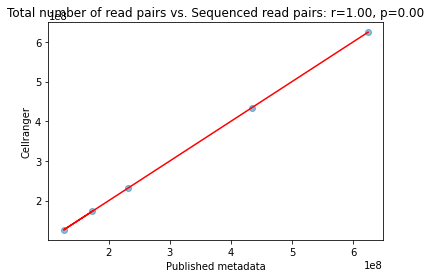

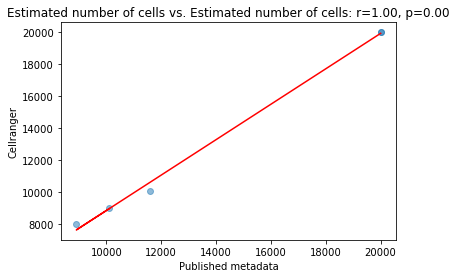

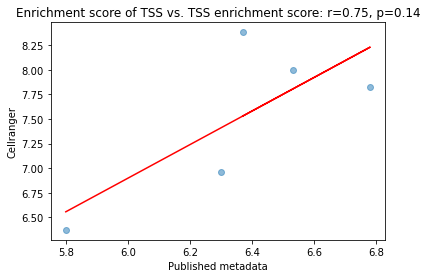

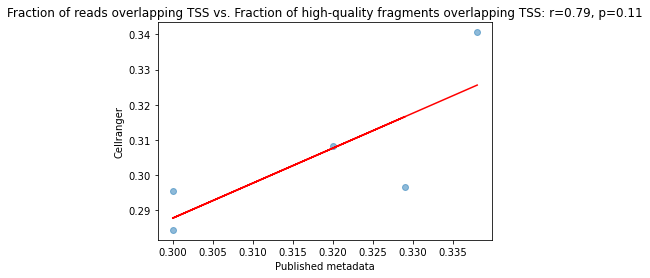

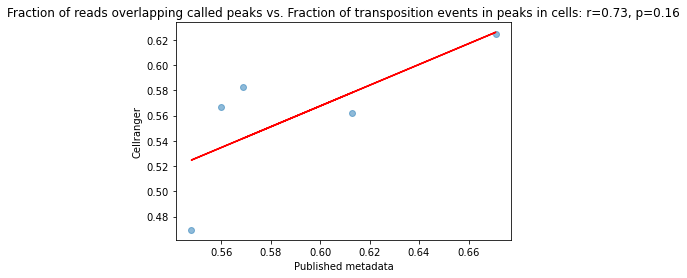

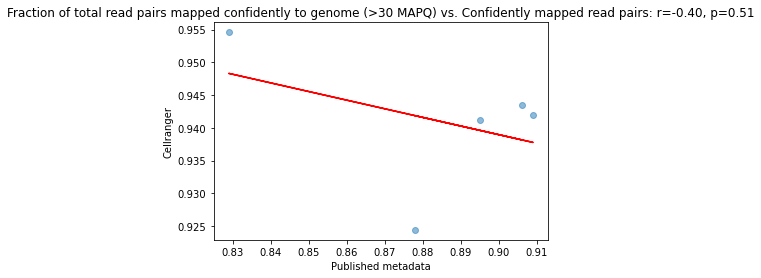

In [7]:
for pair in col_pairs:
    # Scatter plot of total number of read pairs in published metadata vs. cellranger
    plt.scatter(
        published_metadata[pair[0]],
        df[pair[1]],
        alpha=0.5,
    )
    plt.xlabel("Published metadata")
    plt.ylabel("Cellranger")

    # Draw regression line
    slope, intercept, r_value, p_value, std_err = linregress(
        published_metadata[pair[0]],
        df[pair[1]],
    )
    plt.plot(
        published_metadata[pair[0]],
        slope * published_metadata[pair[0]] + intercept,
        color="red",
    )
    plt.title(f"{pair[0]} vs. {pair[1]}: r={r_value:.2f}, p={p_value:.2f}")
    plt.show()

# DONE!

---